# ***Análisis de correspondencias simples.***

## ***Universidad Central***

## ***Maestría en analítica de datos***

## ***Métodos estadísticos para analítica de datos.***
## ***Docente: Luis Andrés Campos Maldonado.***

Vamos a hacer uso de la librería [prince](https://pypi.org/project/prince/). 

- Un pequenio [tutotial](https://maxhalford.github.io/prince/ca/) de su aplicacion.

## ***Protocolo de librerias y funciones auxiliares.***

In [1]:
import prince
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from utils.plots_mca import *
from utils.dataframes import dataframes_example_ca


plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)
warnings.filterwarnings("ignore")

In [2]:
# Importamos la data del ejemplo 1.
data, example_df, example_dfi, pf_row, pf_col = dataframes_example_ca()

## ***Introducción***

En diversas áreas del análisis de datos, es común encontrarse con matrices que representan la relación entre dos variables categóricas. Estas matrices, conocidas como tablas de contingencia, contienen en sus celdas la frecuencia absoluta o relativa de los individuos que pertenecen a cada combinación de categorías. El análisis de estas tablas es fundamental para entender las relaciones subyacentes entre las variables y cómo se distribuyen los individuos en las diferentes categorías.

Para explorar la información contenida en las filas y columnas de estas tablas, se utiliza una técnica estadística llamada análisis de correspondencias (AC). Esta técnica permite encontrar la mejor representación posible de los datos en un espacio reducido, de manera que tanto las filas como las columnas puedan interpretarse en un contexto multidimensional. El AC, al igual que el análisis de componentes principales (PCA), busca reducir la dimensionalidad del conjunto de datos, pero lo hace en el contexto de datos categóricos.

El objetivo del análisis de correspondencias es identificar y caracterizar los patrones de asociación entre las filas y columnas, encontrando aquellas que se "corresponden" en términos de la información que aportan. Es decir, el AC permite identificar grupos de filas o columnas que proporcionan información similar sobre un conjunto de individuos, facilitando la interpretación y comprensión de la estructura de los datos.

En lugar de comparar filas o columnas usando probabilidades condicionales, el AC reduce el problema a unas pocas dimensiones clave. La primera dimensión captura la mayor parte de la asociación total entre las filas y columnas (medida típicamente por el estadístico chi-cuadrado), mientras que las dimensiones subsiguientes explican la variabilidad residual no capturada por las dimensiones anteriores. Este proceso continúa hasta que se han explicado todas las asociaciones relevantes entre filas y columnas.

El número máximo de dimensiones que el análisis puede extraer es igual al menor número de categorías de cualquiera de las dos variables (fila o columna) menos uno. Sin embargo, en la práctica, dos o tres dimensiones suelen ser suficientes para capturar la mayoría de la asociación entre las variables. Estas dimensiones son conceptualmente análogas a las componentes principales en el PCA, proporcionando un resumen compacto y visual de la estructura de los datos.

El análisis de correspondencias se puede aplicar a dos tipos principales de tablas de datos. El primero es el análisis de correspondencias simples, que se utiliza para tablas que contienen las frecuencias de las modalidades de dos variables categóricas. El segundo es el análisis de correspondencias múltiples, que extiende el concepto para manejar múltiples variables categóricas simultáneamente, permitiendo el análisis de relaciones más complejas entre las categorías.

En resumen, el análisis de correspondencias es una herramienta poderosa para descomponer la asociación entre dos variables categóricas en un número reducido de dimensiones, facilitando la interpretación de los datos y proporcionando una visión clara de las relaciones entre las categorías de las variables.

## ***Ejemplo 1.***

Consideremos la tabla de contingencias `example_df`:

In [3]:
example_df

Color Cabello,Rubio(ru),Rojo(r),Medio(m),Oscuro(o),Negro(n),Total_(fi.)
Color Ojos,,,,,,
Claros(C),688,116,584,188,4,1580
Azules(A),326,38,241,110,3,718
Medio(M),343,84,909,412,26,1774
Oscuros(O),98,48,403,681,85,1315
Total_(f.j),1455,286,2137,1391,118,5387


En esta tabla las filas $(i = 1, 2, 3, 4)$
son el color de los ojos y las columnas $(j = 1, 2, 3, 4, 5)$ el color del cabello. Para encontrar la representación más adecuada de estos datos, es necesario ***comparar las filas*** y ***las columnas de la tabla***. Tal comparación implica hacer uso de una medida de distancia apropiada. El análisis de correspondencias permite describir las proximidades existentes entre los perfiles, color del cabello (perfil fila) y color de los ojos (perfil columna), de acuerdo con la partición que se haga de los individuos, sea
por filas o por columnas.

La matriz de densidades o frecuencias relativas $(f_{ij})$ y las densidades marginales de filas $(fi.)$ y columnas $(f.j)$ son las siguientes:

In [4]:
example_dfi.round(2)

,Rubio(ru),Rojo(r),Medio(m),Oscuro(o),Negro(n),Total_(fi.)
Claros(C),12.77,2.15,10.84,3.49,0.07,29.33
Azules(A),6.05,0.71,4.47,2.04,0.06,13.33
Medio(M),6.37,1.56,16.87,7.65,0.48,32.93
Oscuros(O),1.82,0.89,7.48,12.64,1.58,24.41
Total_(f.j),27.01,5.31,39.67,25.82,2.19,100.00


Los números son dados como porcentaje y representan el $f_{ij}*100\%$. Los números a la derecha de
cada fila, presentan las densidades marginales, como el porcentaje $fi.*100\%$, y la última fila representa las densidades marginales por columna $f.j*100\%$. En
resumen, la mayoría de las personas tienen el color de los ojos medio $(32.93\%)$ y el color de cabello más común es también medio $(39.67\%)$.

## ***Representación geometrica de una tabla de contingencia***.

En una tabla de contingencia (matriz de datos) pueden considerarse dos espacios, el espacio fila $(\mathbb R^{p})$ o el espacio columna $(\mathbb R^{n})$. Para el ejemplo anterior, el espacio _color de los ojos_ $(\mathbb R^{5})$ y el espacio _color del cabello_ $(\mathbb R^{4})$, respectivamente.

La matriz de datos $X$, tiene $n$–filas y $p$–columnas, $n_{ij}$ representa el numero de individuos de la fila $i$ y la columna $j$. En el ejemplo, $n_{ij}$ es el numero de individuos con el color de los ojos $i$ y color del cabello $j$.
El numero total de individuos por fila es la sumatoria por fila, así mismo será para el total de individuos por columna.

***Perfil fila.***

Las densidades condicionales por fila son llamadas perfiles fila. 

In [5]:
pf_row

Color Cabello,Rubio(ru),Rojo(r),Medio(m),Oscuro(o),Negro(n),Total_(fi.)
Color Ojos,,,,,,
Claros(C),0.435443,0.073418,0.369620,0.118987,0.002532,1.0
Azules(A),0.454039,0.052925,0.335655,0.153203,0.004178,1.0
Medio(M),0.193348,0.047351,0.512401,0.232244,0.014656,1.0
Oscuros(O),0.074525,0.036502,0.306464,0.517871,0.064639,1.0
Total_(f.j),0.270095,0.053091,0.396696,0.258214,0.021905,1.0


La tabla anterior muestra la distribución del ***color del cabello*** por cada uno de los ***colores de los ojos***.

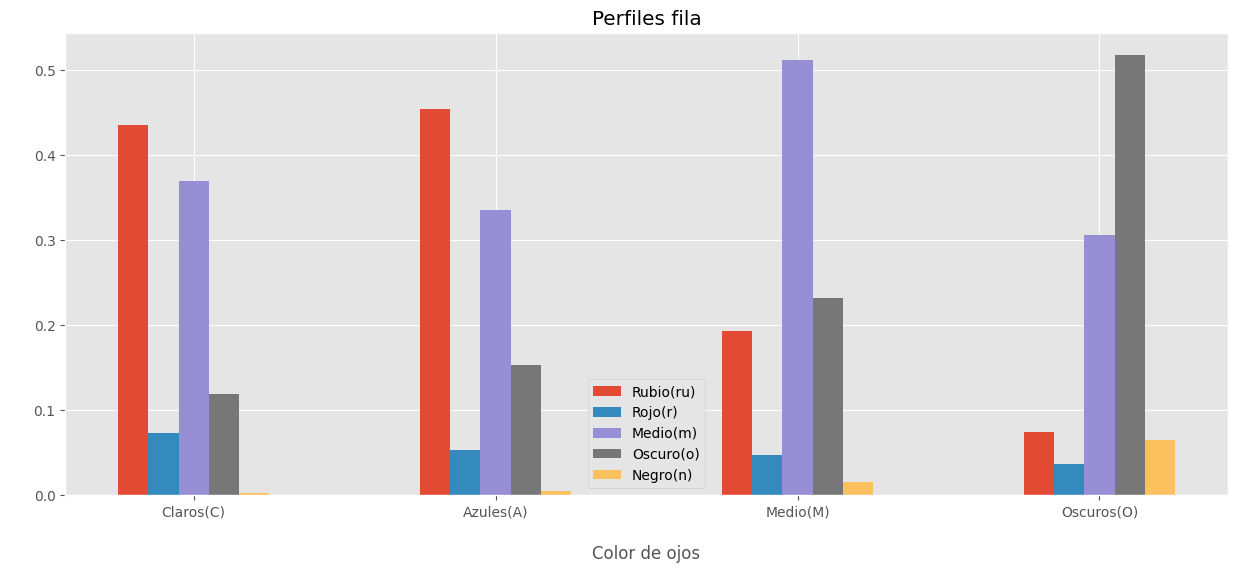

In [6]:
# Plot perfil fila.
temp = pf_row.iloc[0:4, 0:5].T
X_axis = np.arange(len(temp.columns))
a = np.flip(np.arange(-0.2,0.3,0.1))

for i,index in enumerate(temp.index):
  plt.bar(X_axis -1*a[i], temp.loc[index],width=0.1, label = index)
plt.xticks(X_axis,temp.T.index)
plt.xlabel("\nColor de ojos",)
plt.ylabel(" ",)
plt.title("Perfiles fila")
plt.legend()
plt.show()

***Perfil columna.***

Las densidades condicionales por columna son llamadas perfiles columna.


In [7]:
pf_col.T

Color Cabello,Rubio(ru),Rojo(r),Medio(m),Oscuro(o),Negro(n),Total_(fi.)
Color Ojos,,,,,,
Claros(C),0.472852,0.405594,0.273280,0.135155,0.033898,0.293299
Azules(A),0.224055,0.132867,0.112775,0.079080,0.025424,0.133284
Medio(M),0.235739,0.293706,0.425363,0.296190,0.220339,0.329311
Oscuros(O),0.067354,0.167832,0.188582,0.489576,0.720339,0.244106
Total_(f.j),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


La tabla anterior suministra el perfil columna, el cual muestra la distribución del ***color de ojos*** manteniendo constante el ***color del cabello***.

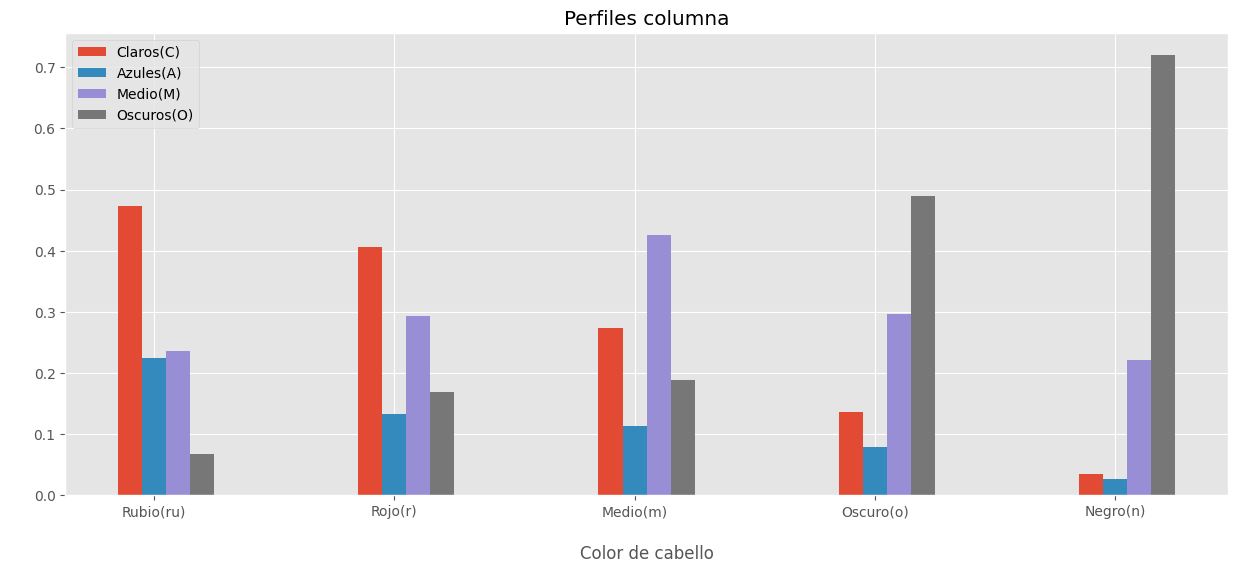

In [8]:
# Plot perfil columna.
plt.figure(figsize=(15,6))
temp = pf_col.iloc[0:5,0:4].T
X_axis = np.arange(len(temp.columns))
a = np.flip(np.arange(-0.2,0.2,0.1))
#
for i,index in enumerate(temp.index):
  plt.bar(X_axis -1*a[i], temp.loc[index],width=0.1, label = index)
plt.xticks(X_axis,temp.T.index)
plt.xlabel("\nColor de cabello",)
plt.ylabel(" ",)
plt.title("Perfiles columna")
plt.legend()
plt.show()

Para el perfil color del cabello (plot anterior), se encuentra una alta ***semejanza entre los perfiles
cabello rubio y rojo***, además de una ***semejanza entre los cabellos oscuro y negro***; el perfil asociado con ***cabello medio*** es bastante diferente de los demás.

- Los perfiles de fila y columna pueden compararse con las distribuciones marginales de las columnas y filas, ponderadas por sus respectivos pesos, para evaluar su grado de desviación respecto a lo esperado bajo la independencia. Esta comparación permite juzgar en qué medida los perfiles se apartan de la independencia. Si los perfiles de fila y columna son similares a sus respectivas distribuciones marginales, esto sugiere que no hay una fuerte asociación entre las filas y columnas, y que los datos se aproximan a un escenario de independencia. Por otro lado, si los perfiles difieren significativamente de las distribuciones marginales, esto indica una desviación considerable de la independencia, revelando una asociación más marcada entre las categorías de las filas y columnas.

## ***Semejanza entre perfiles.***

Una vez que se han definido las dos nubes de puntos, espacio fila $(\mathbb R^{p})$ y espacio columna $(\mathbb R^{n})$, se debe decidir como medir la distancia entre ellos. En el análisis de correspondencias, la semejanza entre dos filas (o entre dos columnas) está dada por la distancia entre sus perfiles. Esta distancia es conocida con el nombre de distancia _ji-cuadrado_ y se nota por $χ^2$. 

1. La distancia entre dos perfiles fila $i$ y $i'$ esta dada por:

$$d^2(i,i')=∑_{j=1}^p\frac{1}{f_{.j}}\left(\frac{f_{ij}}{f_{i.}}-\frac{f_{i'j}}{f_{i'.}}\right)$$

2. La distancia entre dos perfiles columna $j$ y $j'$ esta dada por:

$$d^2(j,j')=∑_{i=1}^n\frac{1}{f_{i.}}\left(\frac{f_{ij}}{f_{.j}}-\frac{f_{ij'}}{f_{.j'}}\right)$$

Las distancias anteriores comparan los histogramas por cada para de filas o columnas. En esta media se da más "importancia" a las categorías o modalidades con menor frecuencia y menos “importancia” a las que tengan alta frecuencia. Las distancias anteriores se traducen en que el AC da prioridad a las modalidades raras, por cuanto éstas, por su escasez, son más diferenciadoras que las otras.

En el análisis de correspondencias (AC), la varianza o inercia se refiere a una medida de dispersión de los perfiles (tanto de filas como de columnas) alrededor de sus respectivos centroides.

La inercia total en AC es análoga a la varianza total en el análisis de componentes principales (ACP), pero se calcula utilizando la distancia ji-cuadrado. Matemáticamente, la inercia total se define como:
$$I = \sum_{i=1}^n \sum_{j=1}^p \frac{(f_{ij} - f_{i.}f_{.j})^2}{f_{i.}f_{.j}}$$
donde:

- $f_{ij}$ es la frecuencia relativa en la celda $(i,j)$

- $f_{i.}$ es la frecuencia marginal de la fila $i$

- $f_{.j}$ es la frecuencia marginal de la columna $j$


La inercia mide la dispersión de los perfiles alrededor del perfil promedio (centroide). Es una medida ponderada de la asociación entre filas y columnas de la tabla de contingencia. Un valor alto de inercia indica una fuerte asociación entre las categorías de filas y columnas. La inercia total está directamente relacionada con la estadística ji-cuadrado de Pearson:
$$I = \frac{\chi^2}{N}$$
donde $N$ es el total de observaciones y $\chi^2$ es la estadística ji-cuadrado.

En el análisis de correspondencias, la "varianza" o "inercia" se refiere a la dispersión de los perfiles (tanto de filas como de columnas) en el espacio multidimensional definido por la distancia ji-cuadrado. La reducción de dimensionalidad busca capturar la mayor parte de esta inercia en un número reducido de dimensiones ortogonales, permitiendo así una representación visual y una interpretación más sencilla de las asociaciones entre categorías.

## ***Ajuste de las dos nubes de puntos.***


El problema consiste en encontrar un subespacio $(\mathbb R^{q})$ de dimensión menor que
el espacio fila $(\mathbb R^{p})$, que conserve el máximo de la información de la nube de puntos original; una medida de la cantidad de información es la
cantidad de varianza o inercia retenida por el subespacio $(\mathbb R^{q})$. De la misma forma que el PCA, el AC procede a buscar una sucesión de ejes ortogonales
sobre los cuales la nube de puntos es proyectada.

De manera completamente análoga se hace para el caso de las filas.


#### ***Puntos Extremos y la Composición de su Perfil***

En el Análisis de Correspondencias (AC), los puntos en el gráfico factorial representan perfiles que pueden corresponder a las filas o columnas de la tabla de contingencia. La posición de estos puntos en el espacio factorial nos proporciona información clave sobre cómo se relacionan entre sí y con las dimensiones principales del análisis.

- ***Posición Extrema de los Puntos:*** Cuando un punto aparece en una posición extrema, es decir, lejos del origen en el gráfico factorial, esto indica que el perfil correspondiente tiene una composición particular o distintiva en comparación con otros perfiles. Un perfil extremo se caracteriza por tener valores que lo diferencian significativamente de los demás, lo que implica que es un perfil único en el contexto del análisis.

- ***Seguridad en la Composición del Perfil:*** Cuanto más extremo sea un punto, mayor será la seguridad sobre la precisión con la que se ha capturado la composición del perfil en el espacio factorial. Esto se debe a que los puntos extremos suelen estar bien representados por las primeras dimensiones, que son las que explican la mayor parte de la inercia (varianza) en los datos. Un punto extremo no es una mezcla de otros perfiles y, por tanto, su posición refleja fielmente su contribución a las dimensiones principales.


#### ***Relaciones Cuasi-Baricéntricas en la Representación de Filas y Columnas***

En el Análisis de Correspondencias, tanto las filas como las columnas de la tabla de contingencia se representan simultáneamente en el mismo gráfico factorial, permitiendo una interpretación conjunta de sus relaciones.

- ***Relaciones Cuasi-Baricéntricas:*** Aunque las filas y las columnas pertenecen a espacios diferentes (ya que las filas son perfiles en un espacio y las columnas en otro), el AC permite proyectarlas en un espacio común de forma que se pueden interpretar sus relaciones de manera significativa. Esta relación se conoce como cuasi-baricéntrica, lo que significa que, aunque los puntos de fila y columna no están en el mismo espacio de datos original, su proximidad en el gráfico puede interpretarse como una indicación de asociación.

- ***Distancia entre Puntos de Filas y Columnas:*** Es importante destacar que no tiene sentido interpretar la distancia métrica entre un punto de fila y un punto de columna en el gráfico factorial, ya que provienen de espacios diferentes y la matriz de datos original no es simétrica. Por lo tanto, la distancia entre una fila y una columna no refleja una relación métrica directa entre esos puntos.

- ***Interpretación de la Proximidad:*** Sin embargo, la proximidad de un punto de fila a los puntos de columna (y viceversa) sí tiene un significado interpretativo útil. Por ejemplo, si un punto de fila está cerca de un punto de columna, esto sugiere que el perfil de esa fila está asociado a esa columna, es decir, que tiene valores altos en esa columna. Aunque no se debe interpretar la distancia como una métrica precisa, la posición relativa de estos puntos ayuda a entender cómo se relacionan las filas y columnas en el contexto del análisis.

## ***Interpretacion de los ejes factoriales.***

El problema central, una vez se ha reducido la dimensionalidad del conjunto de datos, es la asignación de un nombre a los primeros ejes factoriales, para interpretar las proyecciones sobre los planos factoriales, junto con la superposición, de acuerdo con las relaciones de transición.

### 1. ***Contribución absoluta de cada eje a la variabilidad total.***

La contribución absoluta de un perfil a un eje factorial expresa la proporción de la varianza (inercia) que ese perfil aporta a la varianza "retenida" por dicho eje. A través de estas contribuciones absolutas, se puede identificar qué perfiles son responsables de la construcción de un factor. Esto indica en qué medida un perfil $i$ contribuye a la inercia del eje.

Para interpretar un eje, es importante identificar los perfiles con mayor contribución, sin perder de vista que la contribución media de un perfil $i$ es $1/n$, donde  $n$ es el número total de perfiles (filas o columnas). Se debe prestar atención a los signos de las coordenadas respecto al eje, ya que estos también influyen en la interpretación.

### ***2. Cos2 (Cosenos Cuadrados) y Contribución de los Perfiles.***

Los cosenos cuadrados permiten medir la calidad de la representación de los puntos en el espacio definido por los primeros ejes factoriales y la detección de puntos mal representados en los ejes seleccionados. ***Valores de estos cosenos al cuadrado próximos a 1*** dan cuenta de puntos que influyen o están asociados altamente con el respectivo eje. Por supuesto, valores bajos indican una contribución “pobre” del eje en la posición del punto.

## ***Retomando el Ejemplo 1.***

In [9]:
# Matriz X para AC.
X = pd.DataFrame(
    data,
    columns=["Rubio(ru)", "Rojo(r)", "Medio(m)","Oscuro(o)", "Negro(n)"],
    index=["Claros(C)","Azules(A)", "Medio(M)","Oscuros(O)"]
)

X.columns.rename("Color Cabello", inplace=True)
X.index.rename("Color Ojos", inplace=True)
X

Color Cabello,Rubio(ru),Rojo(r),Medio(m),Oscuro(o),Negro(n)
Color Ojos,,,,,
Claros(C),688,116,584,188,4
Azules(A),326,38,241,110,3
Medio(M),343,84,909,412,26
Oscuros(O),98,48,403,681,85


In [10]:
# Prueba chi2 de indepencia.
x2_value, p_value, dof, expected = chi2_contingency(X)
print("El p-valor de la prueba de independencia es: {:.3f}".format(p_value))

El p-valor de la prueba de independencia es: 0.000


Este $p$-valor indica que NO hay independencia entre las 2 variables, es decir, hay dependencia estadísticamente significativa entre ambas variables.

In [11]:
# Instanciamos un objeto prince.CA()
ca = prince.CA(n_components=3, random_state=42)
# Ajustamos el CA
ca = ca.fit(X)

Es importante comentar que se examinan los valores propios (`eigenvalues`) para determinar el número de ejes a considerar. Los valores propios y la proporción de varianzas retenidas por los diferentes ejes se pueden extraer usando el atributo `eigenvalues_summary` del objeto de `CA` de prince

In [12]:
# Veamos los eigenvalores, varianza y varianza acumulada.
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.199,86.56%,86.56%
1,0.030,13.07%,99.63%
2,0.001,0.37%,100.00%


La tabla anterior indica que con la primera dimensión se reúne el $86.6\%$ de la varianza y que con la segunda dimensión se reúne casi toda su variabilidad; es
decir, $99.7\%$.

***Nota:*** Los valores propios se pueden utilizar para determinar el número de ejes a retener. No existe una “regla general” para elegir el número de dimensiones a conservar para la interpretación de los datos. Depende de la pregunta de investigación y la necesidad del investigador. Por ejemplo, se puede estar satisfecho con el 80% de la variación total explicada, así que se pueden usar la cantidad de dimensiones necesarias para lograrlo.

### ***Información espacio fila.***

In [13]:
# Contribuciones fila.
contrib = ca.row_contributions_*100
contrib.rename(columns={0:"Dim1",1:"Dim2",2:"Dim3"})

,Dim1,Dim2,Dim3
Claros(C),28.590673,7.628833,34.450625
Azules(A),10.719176,12.120781,63.831659
Medio(M),0.186754,65.700687,1.181429
Oscuros(O),60.503397,14.549698,0.536287


***Nota:***

+ Las filas que más contribuyen a $Dim1$ y $Dim2$ son las más importantes para explicar la variabilidad en el conjunto de datos.

+ Las filas que no contribuyen mucho a ninguna dimensión o que contribuyen a las últimas dimensiones son
menos importante.

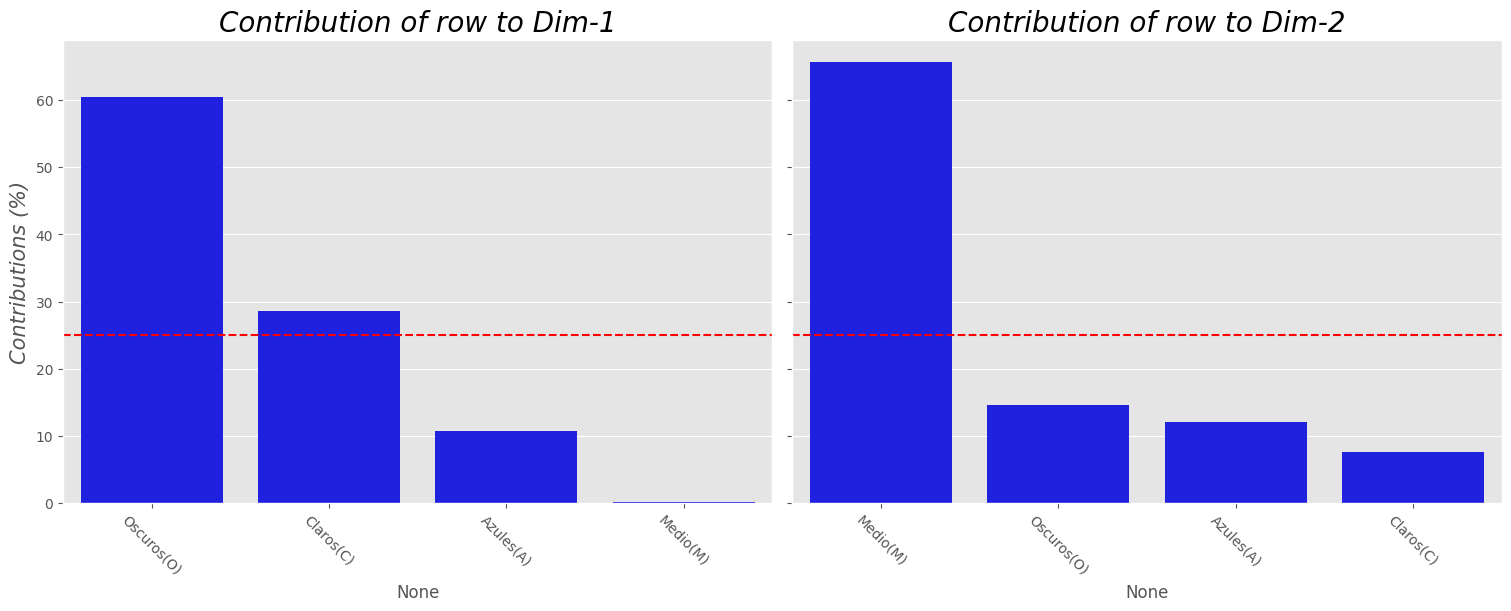

In [14]:
# Plot contribuciones.
plot_contrib(ca, X, choice="index")

***Comentarios:***

1. Note que en el primer eje los perfiles fila que más contribuyen en su representación son los _colores de ojos_ Oscuros y Claros.

2. Para el segundo eje quien más contribuye es el _color de ojos_ Medio.

3. El _color de ojos_ Azul no contribuye de manera significativa en la construcción de los 2 primeros ejes.

In [15]:
# cos2 fila.
get_cos2(ca, X, choice="index")

,Dim1,Dim2,Dim3
Color Ojos,,,
Claros(C),0.956489,0.038539,0.004972
Azules(A),0.835815,0.142715,0.021470
Medio(M),0.018467,0.981029,0.000504
Oscuros(O),0.964924,0.035039,0.000037


Las coordenadas para la “reconstrucción” de la matriz $X$
se obtienen mediante:

In [16]:
# Coordenadas perfiles fila.
ca.row_coordinates(X)

,0,1,2
Color Ojos,,,
Claros(C),-0.440708,-0.088463,-0.031773
Azules(A),-0.400300,-0.165411,0.064158
Medio(M),0.033614,0.245002,0.005553
Oscuros(O),0.702739,-0.133914,-0.004345


In [17]:
ca_plot_cos2(ca, X, choice="index")

In [18]:
# Coordenadas perfiles columna.
ca.column_coordinates(X)

,0,1,2
Color Cabello,,,
Rubio(ru),-0.543995,-0.173844,0.012522
Rojo(r),-0.233261,-0.048279,-0.118055
Medio(m),-0.042024,0.208304,0.003236
Oscuro(o),0.588709,-0.103950,0.010116
Negro(n),1.094388,-0.286437,-0.046136


***Comentario:***

Como $cos2$ mide la calidad de la representación de los perfiles fila (en este caso) en los primeros ejes factoriales, tenemos en todos los perfiles una buena representación.

### ***Información espacio columna***

In [19]:
# Contribuciones columna
ca.column_contributions_*100

,0,1,2
Rubio(ru),40.116171,27.130778,4.927568
Rojo(r),1.449827,0.411300,86.089647
Medio(m),0.351615,57.210800,0.483464
Oscuro(o),44.915260,9.273788,3.074599
Negro(n),13.167126,5.973333,5.424723


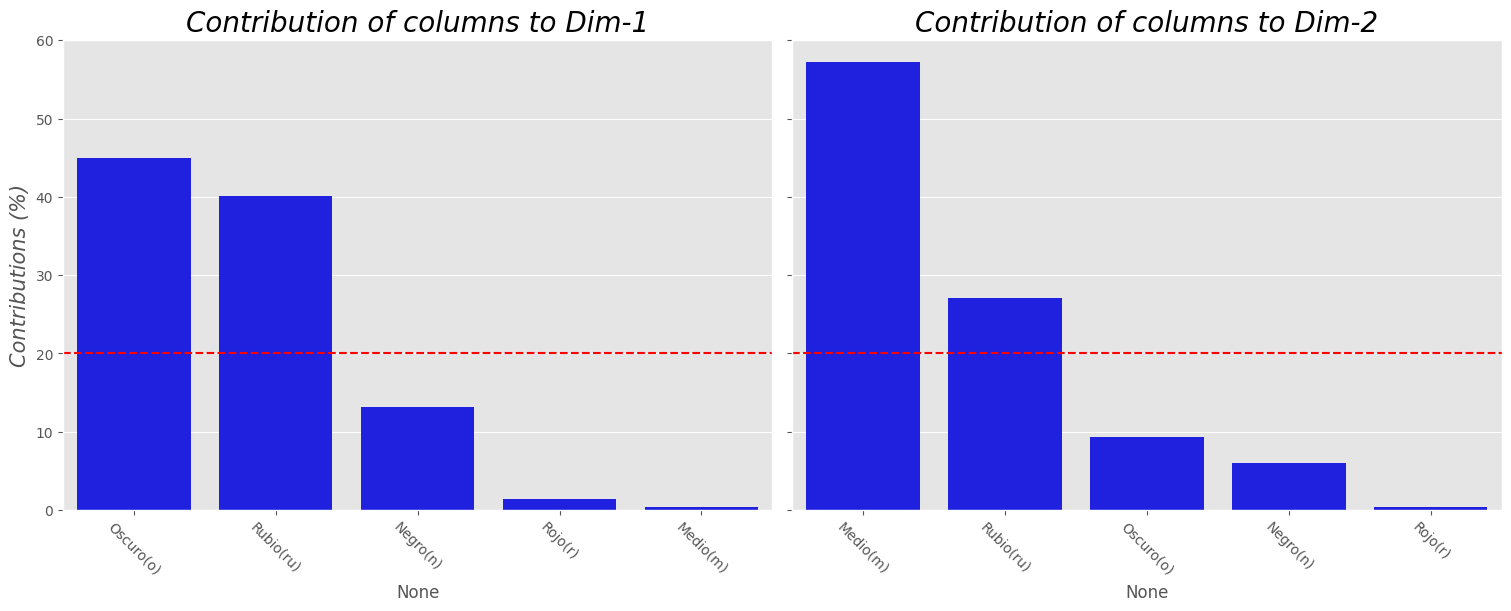

In [20]:
# Plot contribuciones columna
plot_contrib(ca, X, choice="columns")

In [21]:
# cos2 perfiles columns
get_cos2(ca, X, choice="columns")

,Dim1,Dim2,Dim3
Color Cabello,,,
Rubio(ru),0.906902,0.092617,0.000481
Rojo(r),0.769833,0.032978,0.197188
Medio(m),0.039100,0.960668,0.000232
Oscuro(o),0.969487,0.030227,0.000286
Negro(n),0.934334,0.064005,0.001660


In [22]:
ca_plot_cos2(ca, X, choice="columns")

Note que se pueden hacer comentarios similares que en el caso del espacio fila. En particular el _color de cabello_ queda bien presentado en las 2 dimensiones.

In [23]:
#ca.plot(
#    X,
#    x_component=0,
#    y_component=1,
#    show_row_markers=True,
#    show_column_markers=True,
#    show_row_labels=False,
#    show_column_labels=False
#).show()

In [24]:
ca_biplot(ca, X)

***Comentarios finales:***

1. La primera dimensión está relacionada con el ***color
del cabello***, variando, de izquierda a derecha, desde el rubio hasta el negro.

2. Se puede apreciar que los datos referentes a los ojos siguen un “patrón” similar al del cabello, con colores oscuros a la derecha y claros a la izquierda. 

3. Los puntos para ***azul***, ***rubio*** están razonablemente próximos.

***En resumen, la dirección del color es de izquierda a derecha, y va de claro a oscuro; tanto para el cabello como para los ojos.***

## ***Ejemplo 2.*** 

Los siguientes datos son una tabla de 1744 registros que contiene 13 tareas domésticas y su reparto en la pareja:

- La primera columna son las diferentes tareas.

- La segunda columna contiene quien realiza dicha tarea: `Wife` (solo la esposa), `Alternating` (alternados), `Husband` (solo el esposo) o `Jointly`.

In [25]:
# Importamos el dataset
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"
file_name = "housetasks.csv"
df = pd.read_csv(url_base +file_name)
df.columns = ["task","who"]
for i in df.columns:
  print("-",i,":",df[i].unique(),"\n")

- task : ['Laundry' 'Main_meal' 'Dinner' 'Breakfeast' 'Tidying' 'Dishes' 'Shopping'
 'Official' 'Driving' 'Finances' 'Insurance' 'Repairs' 'Holidays'] 

- who : ['Wife' 'Alternating' 'Husband' 'Jointly'] 



In [26]:
# Tabla de contingencias.
df_crosstab = pd.crosstab(df["task"], df["who"])
df_crosstab

who,Alternating,Husband,Jointly,Wife
task,,,,
Breakfeast,36,15,7,82
Dinner,11,7,13,77
Dishes,24,4,53,32
Driving,51,75,3,10
Finances,13,21,66,13
Holidays,1,6,153,0
Insurance,1,53,77,8
Laundry,14,2,4,156
Main_meal,20,5,4,124


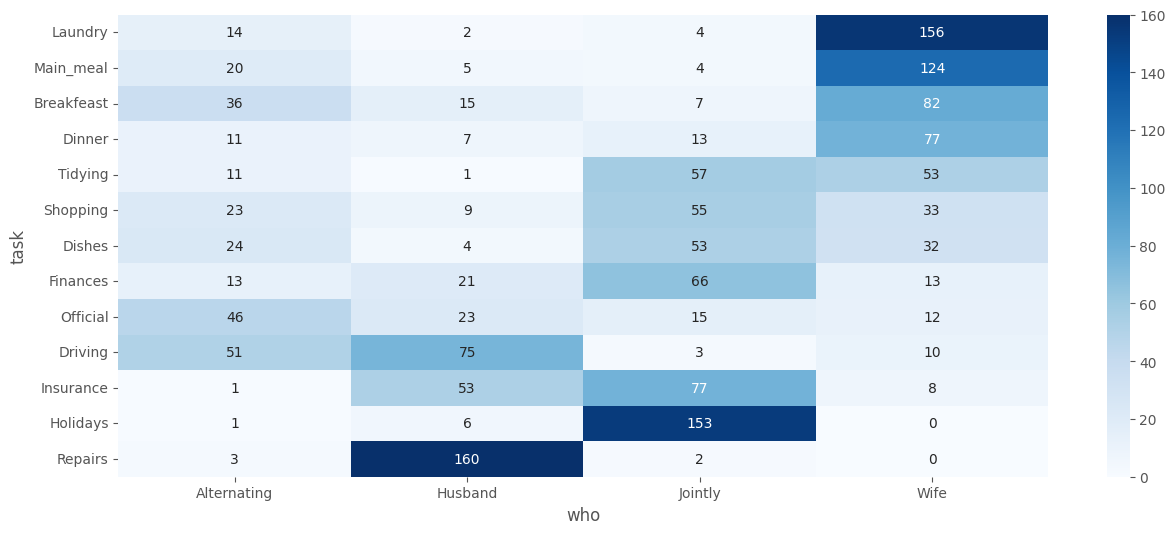

In [27]:
# Heatmap tabla de contingencias.
sns.heatmap(df_crosstab.sort_values(by=["Wife"],ascending=False), annot=True, cmap = "Blues", fmt=".0f")
plt.show()

- Se observa que las tareas de la casa (`Laundry` (lavandería), `Main_Meal` (comida principal) y `Dinner` (cena)) son realizadas con mayor frecuencia por
la esposa.

- `Repairs` (reparaciones) y `Driving` (conducción) son realizadas predominantemente por el esposo.

- Los `Holidays` se asocian con más frecuencia a la columna `Jointly`.


La prueba $\chi^{2}$ de independencia se muestran a continuación:

In [28]:
# Con scipy.
x2_value, p_value, dof, expected = chi2_contingency(df_crosstab)
print("El p-valor de la prueba es:",p_value)

El p-valor de la prueba es: 0.0


Dado el $p$-valor, y a una significancia $\alpha=0.05$ se concluye que:

***LAS TAREAS DEL HOGAR NO SON INDEPENDIENTES DE QUIEN LAS HACE.***

In [29]:
# Creamos y ajustamos un objeto CA de prince.
ca = prince.CA(n_components=3)
ca.fit(df_crosstab)

In [30]:
# Varianza retenida,
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.543,48.69%,48.69%
1,0.445,39.91%,88.60%
2,0.127,11.40%,100.00%


+ Recuerde que la dimensión (`Dim1`) explica la mayor cantidad de variación, seguida por la dimensión 2 (`Dim2`) y así sucesivamente. 

+ Alrededor del 88,6% de la variación se explica por las dos primeras dimensiones. Este es un porcentaje aceptablemente alto. 




In [31]:
# Gráfico de sedimentación.
screeplot(ca)

De acuerdo con el plot anterior, ***solo las dimensiones 1 y 2 deben usarse en la solución***. La dimensión 3
explica sólo el $11,4\%$ de la inercia total y está por debajo de la cantidad:

$$\frac{1}{min(nrow,ncol)-1}=33,33\%$$

que es el valor propio promedio. 

Con un $\%$ tan bajo la dimensión 3, no debería ser considerada en un posterior análisis.

***Nota:*** Tenga en cuenta que puede usar más de 2 dimensiones. Sin embargo, las dimensiones suplementarias no contribuyen significativamente a la interpretación de la naturaleza de la asociación entre las filas y columnas.

In [32]:
# Biplot.
ca_biplot(ca, df_crosstab)

Recuerdemos que la distancia entre cualquier punto de fila o columna da una medida de su similitud (o
disimilitud). Los puntos de fila con un perfil similar se cierran en el mapa de factores. Lo mismo es válido para los puntos de columna.

Este gráfico muestra que:

1. Las tareas del hogar, como la `Dinner`, `Breakfeast`, `laundry` , `Main_meal` son realizadas con mayor frecuencia por la esposa (`Wife`).

2. `Driving` y `Repairs` las realiza el marido (`Husband`).

3. Tareas como `Holidays` y `Finances` se realizan de manera conjunta (`Jointly`).

El siguiente paso para la interpretación es determinar qué perfiles fila y columna contribuyen más
en la definición de las diferentes dimensiones retenidas en el modelo.

### ***Espacio fila***

Recuerde que debemos visualizar los puntos fila en busca de:

1. Sus contribuciones a las dimensiones ***(contribución absoluta)***.
2. Su calidad de representación en el mapa de factores ***(contribución relativa).***

In [33]:
# Coordenadas fila.
ca.row_coordinates(df_crosstab).head()

,0,1,2
task,,,
Breakfeast,-0.508600,-0.452804,0.220405
Dinner,-0.692574,-0.308104,-0.207414
Dishes,-0.188964,0.441966,0.266949
Driving,0.741770,-0.653414,0.544458
Finances,0.270767,0.617868,0.034797


In [34]:
# Coordenadas de la fila
temp = ca.row_coordinates(df_crosstab)
fig = px.scatter(data_frame=temp, x=0, y=1, text=temp.index, template="plotly_white",)
fig.add_hline(y=0, line_color="pink")
fig.add_vline(x=0, line_color="pink")
fig.show()

***El gráfico anterior muestra las relaciones entre los puntos de fila:***

1. Las filas con un perfil similar se agrupan.

2. Las filas con correlación negativa se colocan en lados opuestos del origen del gráfico (cuadrantes opuestos).

3. La distancia entre los puntos de fila y el origen mide la calidad de los puntos de fila en el mapa del factor. Los puntos de fila que están alejados del origen están bien representados en el mapa de factores.

Algo que es frecuente que suceda es que no todos los puntos se muestran igual "de bien" representados en las dos dimensiones. Recordemos que el $cos2$ mide el grado de asociación entre filas/columnas y un eje en particular, es decir, la calidad de la representación de las filas/columnas  en el mapa de factores.

In [35]:
get_cos2(ca, df_crosstab, choice="index")

,Dim1,Dim2,Dim3
task,,,
Breakfeast,0.504943,0.400230,0.094827
Dinner,0.776640,0.153703,0.069657
Dishes,0.118118,0.646153,0.235730
Driving,0.432019,0.335229,0.232752
Finances,0.160677,0.836670,0.002654
Holidays,0.029792,0.962360,0.007848
Insurance,0.576012,0.308802,0.115186
Laundry,0.739987,0.184552,0.075460
Main_meal,0.741603,0.232359,0.026038


1. ***Los valores de $cos2$ están comprendidos entre 0 y 1. La suma de $cos2$ por filas en todas las dimensiones del CA es igual a uno.***

2. Si un elemento de fila está bien representado por dos dimensiones, la suma de $cos2$ es cercana a 1, para algunos elementos fila, se requieren más de 2 dimensiones para representar perfectamente los datos.

3. La calidad de representación de una fila o columna en $n$ dimensiones es simplemente la suma de las
coseno cuadrado de esa fila o columna sobre las $n$ dimensiones.

Puede visualizar el $cos2$ en los perfiles fila en todas las dimensiones, podemos generar el siguiente mapa de calor.

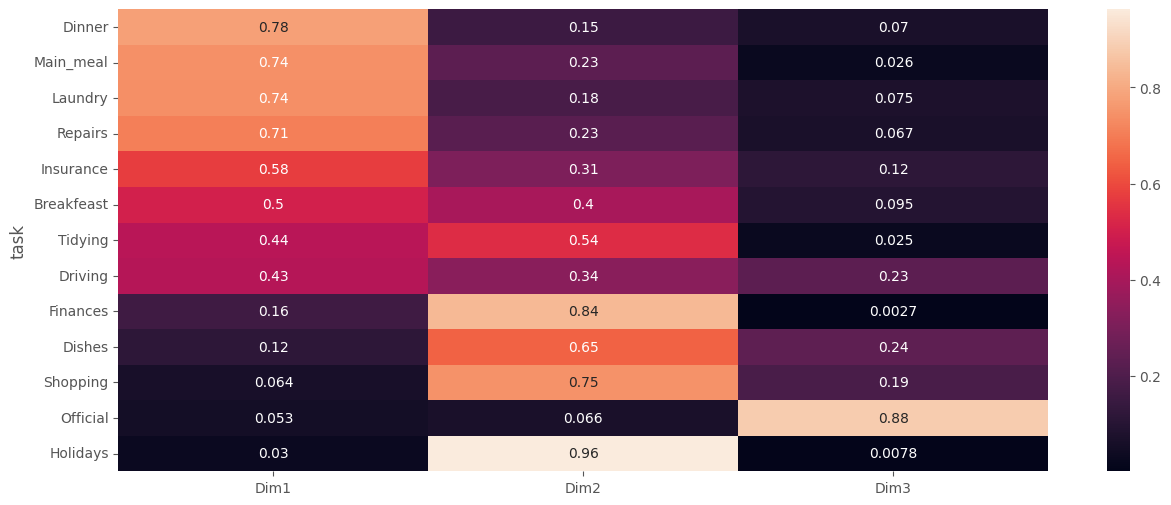

In [36]:
tmp = get_cos2(ca, df_crosstab)[["Dim1","Dim2", "Dim3"]]
sns.heatmap(tmp.sort_values(by=["Dim1"], ascending = False), annot=True)
plt.show()

In [37]:
ca_plot_cos2(ca, df_crosstab, choice="index")

También podemos generar un barplot de los perfiles filas con el $cos2$ con la función `plot_representation_cos2()`:

In [38]:
plot_bar_cos2(ca,df_crosstab,choice="index")

Notemos que todos los perfiles fila, salvo `Official`, están bien representados por las dos primeras dimensiones. Esto implica que la posición del punto correspondiente al elemento `Official` en el diagrama de dispersión debe ser interpretada con cierta cautela.

La contribución de las filas (en %) a la definición de las dimensiones se extraer de la siguiente manera:

In [39]:
contrib = ca.row_contributions_.rename(columns={0:"Dim1",1:"Dim2",2:"Dim3"})*100
contrib.round(2)

,Dim1,Dim2,Dim3
Breakfeast,3.82,3.70,3.07
Dinner,5.47,1.32,2.10
Dishes,0.43,2.84,3.63
Driving,8.08,7.65,18.60
Finances,0.88,5.56,0.06
Holidays,1.08,42.45,1.21
Insurance,6.15,4.02,5.25
Laundry,18.29,5.56,7.97
Main_meal,12.39,4.74,1.86
Official,0.52,0.80,36.94


***Nota:*** Las variables de fila con mayor valor son las que más contribuyen a la definición de las dimensiones.

Es posible crear un heatmap para resaltar la fila que más contribuye en cada dimensión:

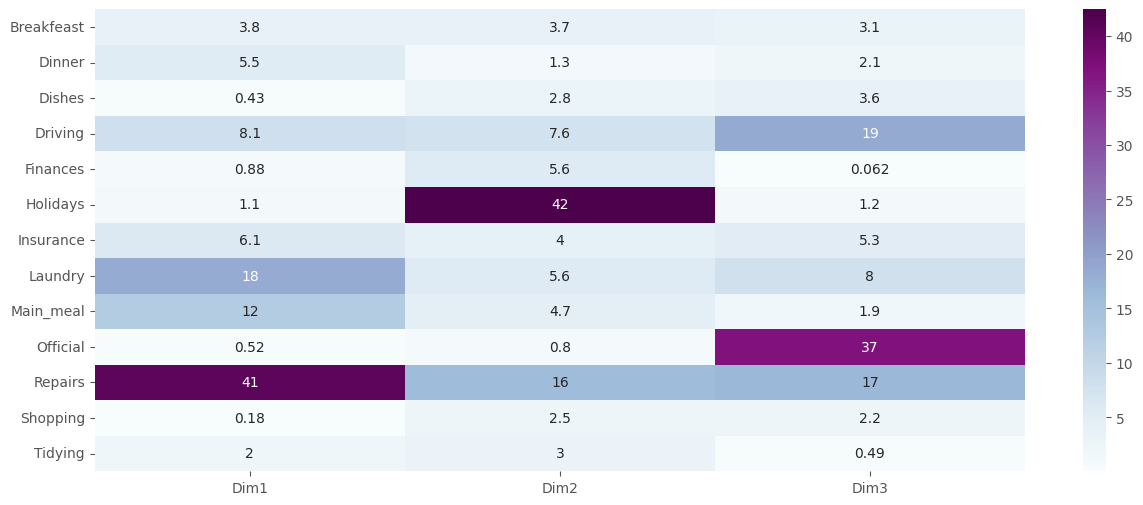

In [40]:
sns.heatmap(contrib, annot=True, cmap="BuPu")
plt.show()

Podemos también plotear un barplot de las contribuciones de las filas.

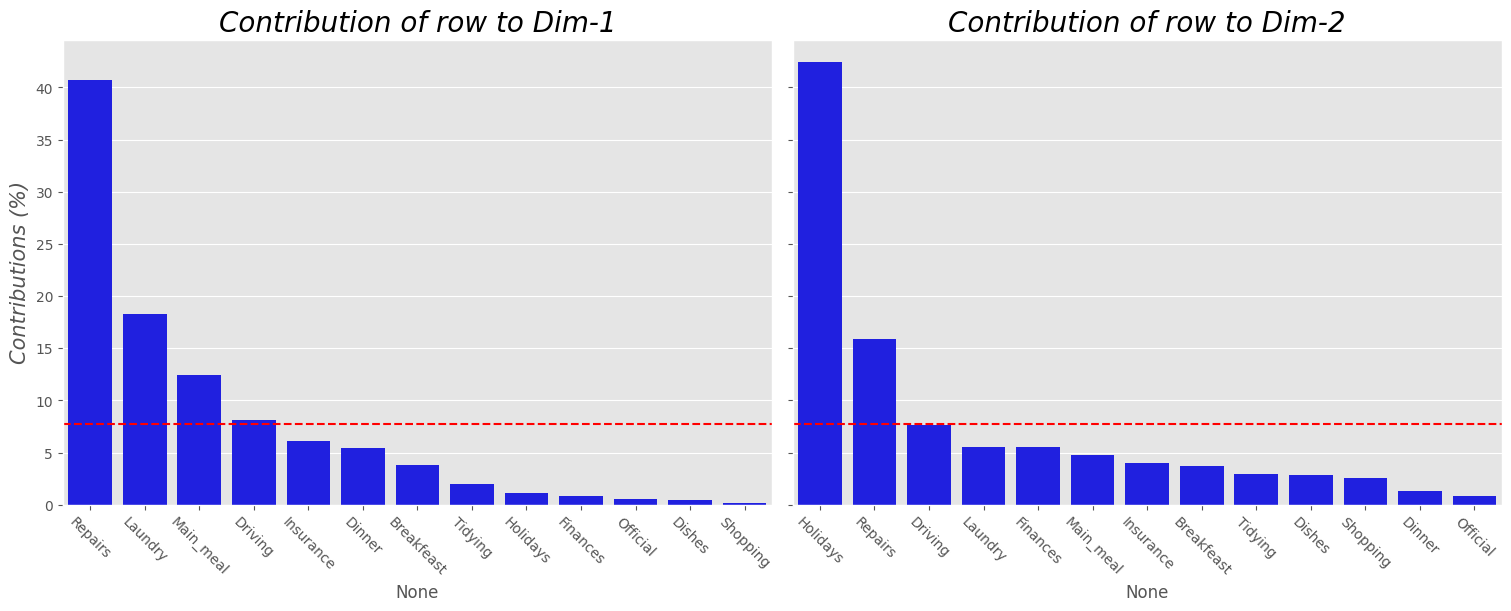

In [41]:
plot_contrib(ca, df_crosstab, choice="index")

***Nota:***

La línea discontinua roja en el gráfico anterior indica el valor promedio esperado, si las contribuciones fueran uniforme.

Se puede ver que:

1. Los elementos de fila `Repairs`, `Laundry`, `Main_meal` y `Driving` son los más importantes en la definición de la primera dimensión.

2. Los elementos de la fila `Holidays` y `Repairs` son los que más contribuyen a la dimensión 2.

Los puntos de fila más importantes (o contribuyentes) se pueden resaltar en el diagrama de dispersión de la siguiente manera:

In [42]:
tmp = ca.row_coordinates(df_crosstab)
contrib = ca.row_contributions_*100
tmp["contrib"] = contrib[[0,1]].mean(axis=1)

px.scatter(
    data_frame=tmp, x=0, y=1, color="contrib", color_continuous_scale="temps",
    text=tmp.index, template="plotly_white"
)

Los perfiles fila `Repairs` y `Driving` tienen una contribución importante en el lado positivo de la primera dimensión, mientras que las categorías `Laundry` y `Main_meal` tienen una mayor contribución al lado negativo de la primera dimensión. En otras palabras, la dimensión 1 se define principalmente por la oposición de `Repairs` y `Driving` (lado postivo), y `Laundry` y `Main_meal` (lado negativo).

### ***Conclusiones espacio fila.***

1. Las variables bien representadas son: `Repairs`, `Driving`, `Holidays`, `Laundry`.

2. La varible que menos es representada: `Official`

### ***Espacio columna.***

In [43]:
plot_bar_cos2(ca, df_crosstab, choice="columns")

In [44]:
# cos2 para las columnas
ca_plot_cos2(ca, df_crosstab, choice="columns")

Notemos que solo el elemento de la columna `Alternating` no se muestra muy bien en los dos primeros
dimensiones. La posición de este elemento debe interpretarse con cautela en el espacio formado por las
dimensiones 1 y 2.

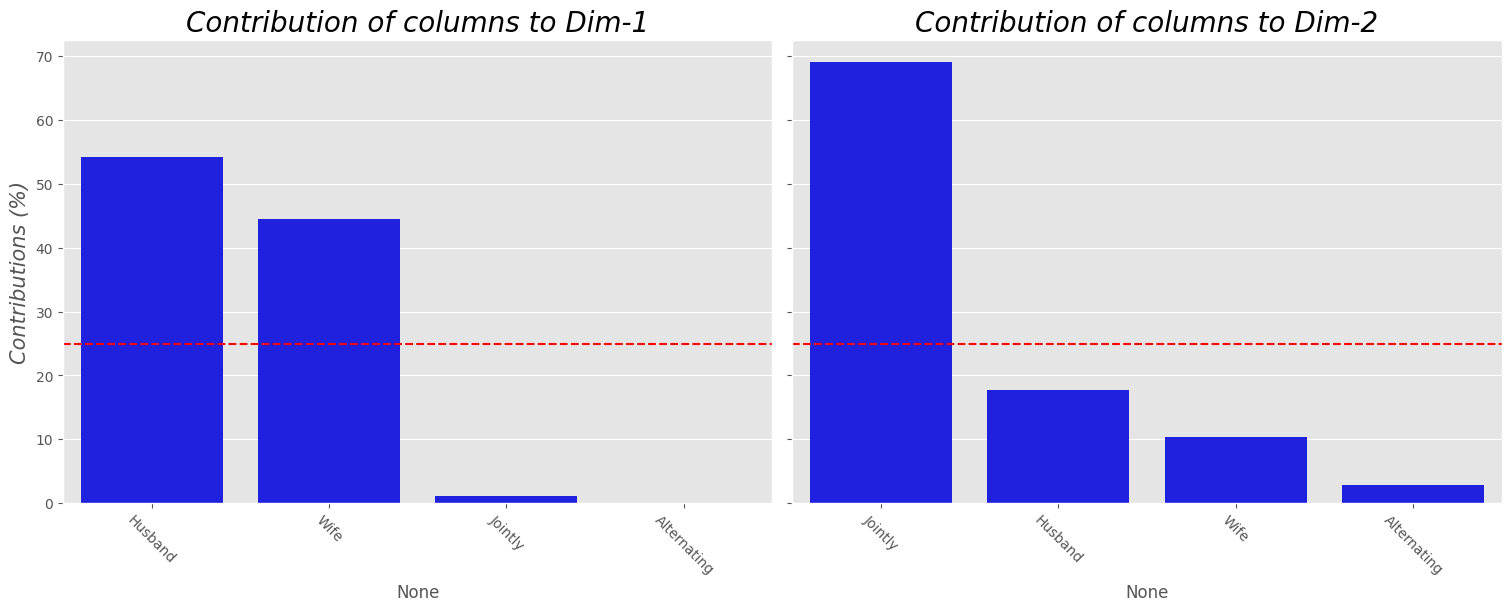

In [45]:
# Contribucion columns
plot_contrib(ca, df_crosstab, choice="columns")

### ***Conclusiones espacio columna.***

1. Todas están bien representadas salvo `Alternating`.

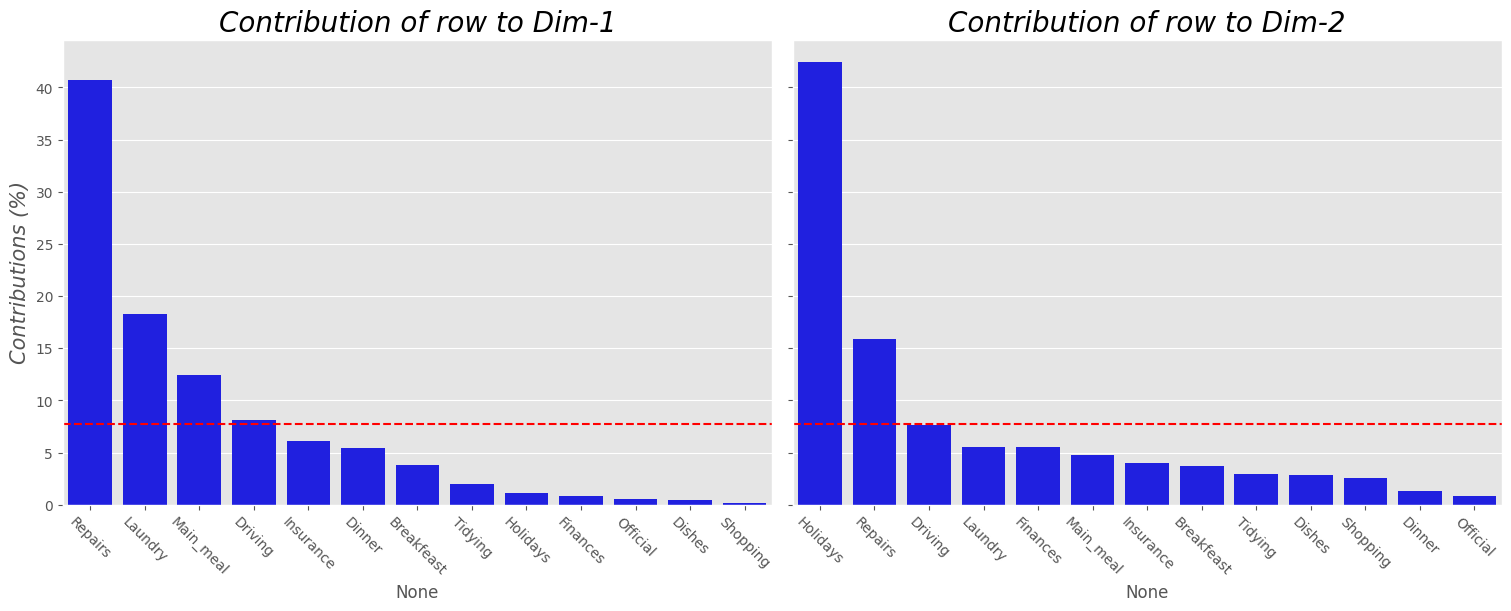

In [46]:
# Contribucion index
plot_contrib(ca,df_crosstab, choice = "index")

In [47]:
ca.plot(
    df_crosstab,
    x_component=0,
    y_component=1,
    show_row_markers=True,
    show_column_markers=True,
    show_row_labels=False,
    show_column_labels=False
).show()

alt.LayerChart(...)

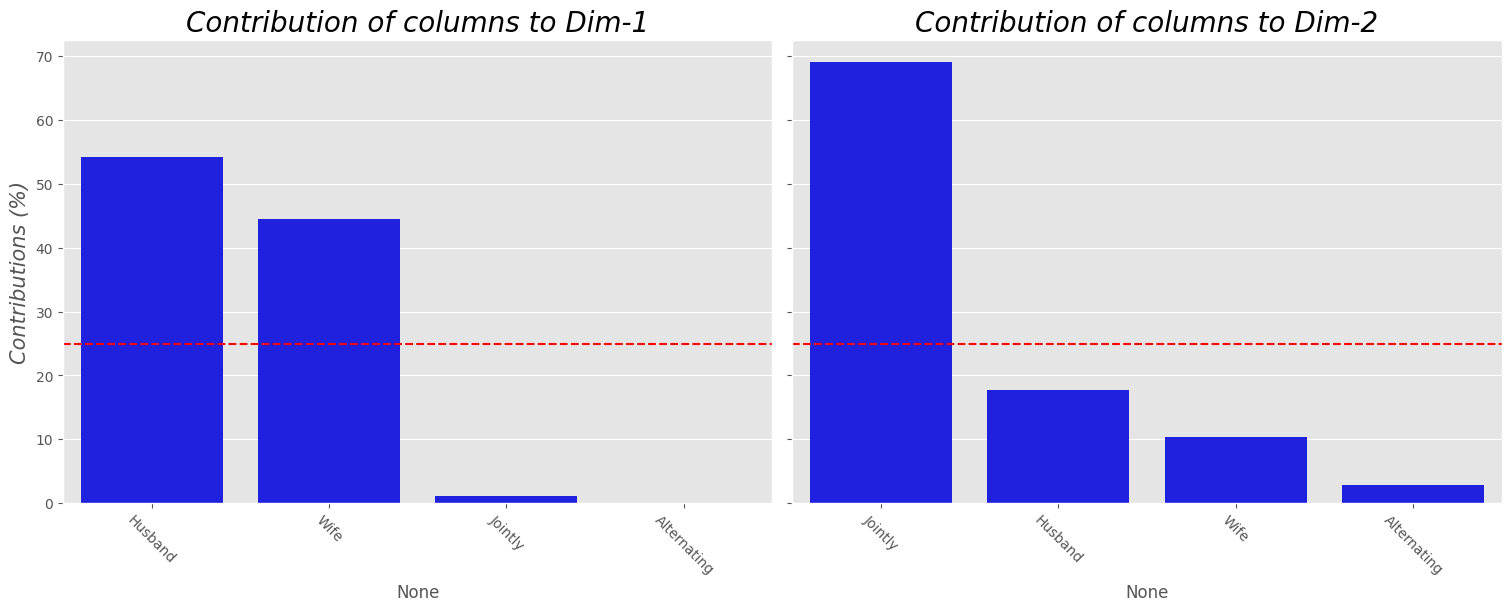

In [48]:
# Contribucion columns
plot_contrib(ca,df_crosstab, choice = "columns")

In [49]:
# Biplot.
ca_biplot(ca, df_crosstab)

### ***Conclusiones ejemplo 2.***

1. Las labores del hogar varían según quien las realiza.

2. Dado que `Husband` está bien representado y así mismo `Driving` y `Repairs`. Son precisamente estas últimas labores las "preferidas" por los hombres. A su vez, tiene menor preferencia por `Laundry`.

3. `Alternating` y `Oficial` están mal representados no es posible asumir asociaciones usando esos perfiles.

4. De igual manera, labores como `Main_meal`, `Laundry` están en correspondencia con la esposa. `Repairs` se asocia negativamente con `Wife`.

5. Las labores conjuntas son las vacaciones.


## ***Ejemplo 3.***

Se pidió a 657 adolescentes que seleccionaran cuál de las 6 características describe mejor 4 marcas populares de teléfonos inteligentes. La data a continuación:

In [50]:
# Data Ejercicio 3.
data = np.array([36,42,7,22,3,5,43,32,56,29,13,35,27,31,24,17,48,36,8,35,37,45,7,19]).reshape(6,4)
row = ["pantalla","precio","diseño","bateria","software","camara"]
cols = ["Apple","Samsung","Nokia","Huawei"]
df = pd.DataFrame(data, index = row, columns = cols )
df.index.rename("caracteristica", inplace=True)
df.columns.rename("marca", inplace=True); df

marca,Apple,Samsung,Nokia,Huawei
caracteristica,,,,
pantalla,36,42,7,22
precio,3,5,43,32
diseño,56,29,13,35
bateria,27,31,24,17
software,48,36,8,35
camara,37,45,7,19


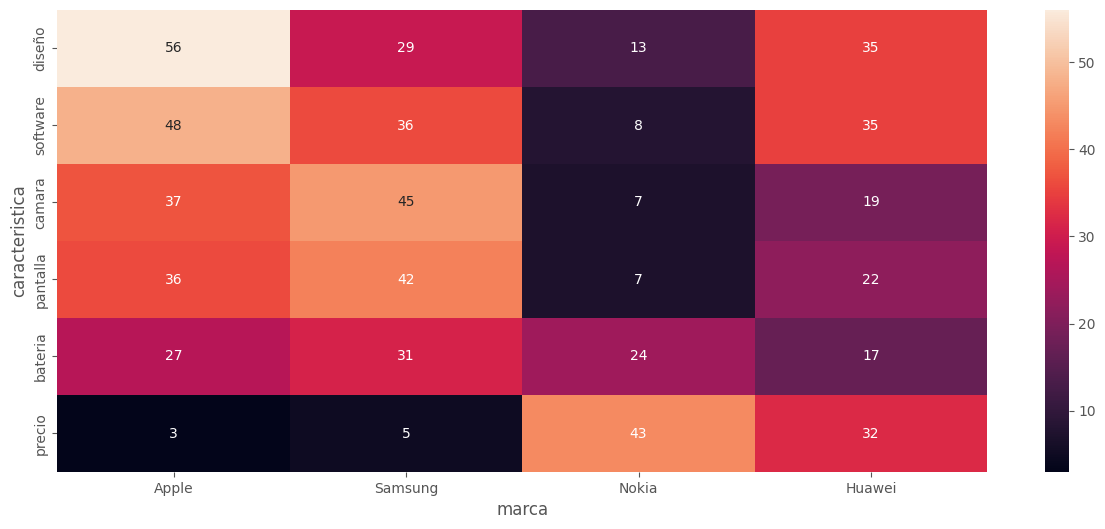

In [51]:
tmp = df.sort_values(by=["Apple"], ascending = False)
sns.heatmap(tmp, annot = True, )
plt.show()

In [52]:
x2_value, p_value, dof, expected = chi2_contingency(df)
print("El estadístico x^2 de la prueba es: {:.2f}".format(x2_value))
print("El p-valor de la prueba es:", p_value)
print("Los grados de libertad son:", dof)

El estadístico x^2 de la prueba es: 164.33
El p-valor de la prueba es: 3.3521729448916556e-27
Los grados de libertad son: 15


In [53]:
# Ajustamos el CA
ca = prince.CA(n_components=4)
ca.fit(df)

In [54]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.219,87.57%,87.57%
1,0.026,10.56%,98.13%
2,0.005,1.87%,100.00%


In [55]:
screeplot(ca)

El plot anterior sugiere que solo debemos usar una dimensión. Vamos a usar 2 factores pues reunen más inercia y un potencial biplot representa mejor la situación.

In [56]:
ca_biplot(ca, df_ca=df)

***Comentarios:***

1. Se puede ver del plot anterior que en los perfiles fila, el factor 1 parece separar el precio de las funciones y el factor 2 parece separar las características del hardware de las características que no son del hardware. Los perfiles que están muy juntos (por ejemplo, el pantalla y la cámara) tienen perfiles similares, mientras que las que están muy alejadas tienen perfiles diferentes (por ejemplo, el diseño y el precio).

2. La dimensión 2 explica cerca del $10\%$.

In [57]:
get_cos2(ca, df, choice="index")

,Dim1,Dim2,Dim3
caracteristica,,,
pantalla,0.842427,0.119950,0.037623
precio,0.997756,0.000343,0.001901
diseño,0.266549,0.664860,0.068591
bateria,0.333734,0.499491,0.166775
software,0.678181,0.277976,0.043844
camara,0.783260,0.211021,0.005719


In [58]:
ca_plot_cos2(ca, df)

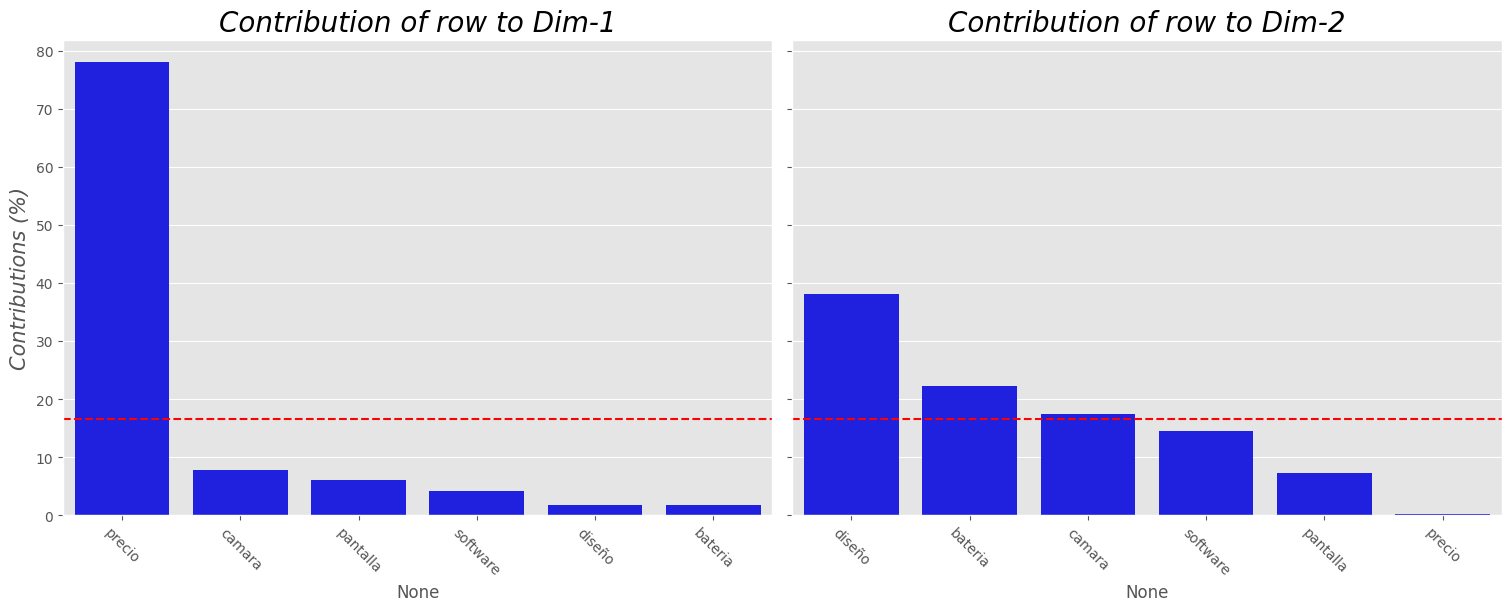

In [59]:
plot_contrib(ca, df, choice="index")

In [60]:
ca_plot_cos2(ca, df, choice="columns")

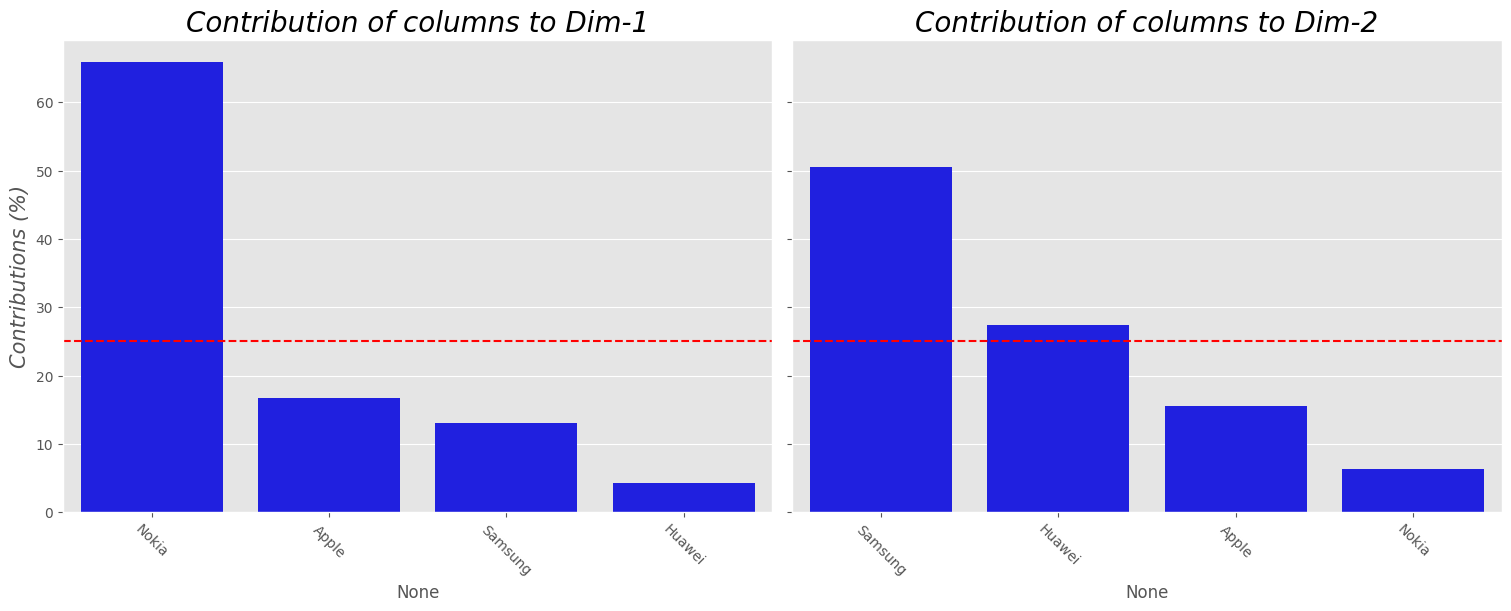

In [61]:
plot_contrib(ca, df, choice="columns")

In [62]:
ca.plot(
    df,
    x_component=0,
    y_component=1,
    show_row_markers=True,
    show_column_markers=True,
    show_row_labels=False,
    show_column_labels=False
).show()

alt.LayerChart(...)

***Comentarios:***

1. Las prefencias por la marca Samsung muestran que se interesan por la camara. Esta marca está en relación opuesta con el precio.

2. Apple esta bastante cerca de software y diseño pero no está bien representada en estas 2 dimensiones, así que no podemos pensar en la asociación.

3. Tanto Huawei como diseño están bien representadas, luego, estas estarán asociadas. A su vez Huawei es menos preferida por su bateria.

4. Nokia es asociada en su preferencia por el precio. Está es sentido opuesto con las características de diseño y camara.

5. Aunque en mejor medida Samsung está asociado con la batería.

## ***Referencias:***

1. _Análisis estadístico de datos multivariados. Díaz L & Morales M. Editorial: Publicaciones Facultad de ciencias. UNAL._

2. _Multivariate Analysis II. Kassambara A. Disponible en: http://www.sthda.com/english/_